In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
import seaborn as sb
import regex

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive/')
%cd 'drive/Shareddrives/CSCI 461/processed'
#%ls processed/*

Mounted at /content/drive/
/content/drive/Shareddrives/CSCI 461/processed


In [ ]:
data = pd.read_csv("combined_ohe_17.csv")
display(data.columns)

Index(['recnumbr', 'age', 'st_AK', 'st_AL', 'st_AR', 'st_AZ', 'st_CA', 'st_CO',
       'st_CT', 'st_DC',
       ...
       'homeless_no', 'homeless_yes', 'subabuse_no', 'subabuse_yes',
       'incarc_no', 'incarc_yes', 'currfte_no', 'currfte_yes', 'currpte_no',
       'currpte_yes'],
      dtype='object', length=160)

In [ ]:
# MAKING EDU BINARY & CATEGORICAL

edu_matrix = data[["highedcert_associate degree","highedcert_bachelor degree","highedcert_high school or ged",
                  "highedcert_higher degree","highedcert_none of the above","highedcert_vocational certificate",
                  "highedcert_vocational license"]]
data["edu_categorical"] = edu_matrix.idxmax(axis=1)
educationBinary = \
{   
    "highedcert_associate degree": 1,
    "highedcert_bachelor degree": 1,
    "highedcert_high school or ged": 1,
    "highedcert_higher degree": 1,
    "highedcert_none of the above":0,
    "highedcert_vocational certificate": 1,
    "highedcert_vocational license": 1
}
data['edu_binary'] = data["edu_categorical"].map(educationBinary) 


In [ ]:
"""
OUTCOMES: 

highcert: Post-high school education
homeless: Homelessness Status 
subabuse: Substance Abuse Referral 
incarc: Incarceration Status
currfte: Current full-time employment
currpte: Current half-time employment 
"""

'\nOUTCOMES: \n\nhighcert: Post-high school education\nhomeless: Homelessness Status \nsubabuse: Substance Abuse Referral \nincarc: Incarceration Status\ncurrfte: Current full-time employment\ncurrpte: Current half-time employment \n'

## EDUCATION

In [ ]:
outcome_df = data[["edu_binary","homeless_yes","subabuse_yes","incarc_yes","currfte_yes","currpte_yes","age"]]

***** ALL AGES ******



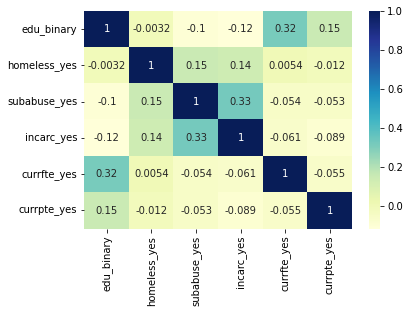


Corr with Edu_Binary:


currfte_yes     0.316762
currpte_yes     0.150413
homeless_yes   -0.003244
subabuse_yes   -0.100427
incarc_yes     -0.115446
Name: edu_binary, dtype: float64

Number of people:



***** UNDER 18 ******



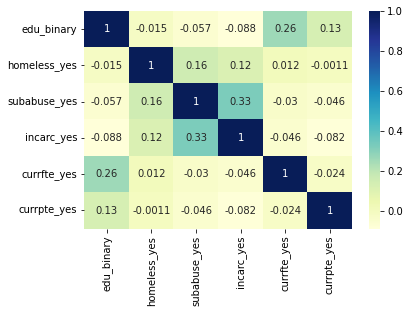


Corr with Edu_Binary:


currfte_yes     0.262548
currpte_yes     0.129330
homeless_yes   -0.014650
subabuse_yes   -0.057054
incarc_yes     -0.087720
Name: edu_binary, dtype: float64




***** OVER 18 ******



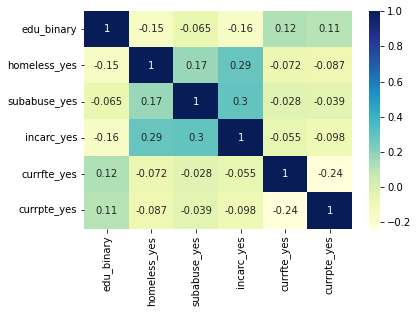


Corr with Edu_Binary:


currfte_yes     0.123421
currpte_yes     0.111126
subabuse_yes   -0.065176
homeless_yes   -0.145174
incarc_yes     -0.160298
Name: edu_binary, dtype: float64

In [ ]:
print("***** ALL AGES ******\n")
corr = outcome_df.drop("age",axis=1).corr()
sb.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()
print("\nCorr with Edu_Binary:")
edu_corr = corr.loc["edu_binary"]
edu_corr.sort_values(ascending=False, inplace=True)
display(edu_corr.drop(["edu_binary"]))
print("Number of people:")

print("\n\n\n***** UNDER 18 ******\n")
corr = outcome_df[outcome_df["age"]<=18].drop("age",axis=1).corr()
sb.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()
print("\nCorr with Edu_Binary:")
edu_corr = corr.loc["edu_binary"]
edu_corr.sort_values(ascending=False, inplace=True)
display(edu_corr.drop(["edu_binary"]))

print("\n\n\n***** OVER 18 ******\n")
corr = outcome_df[outcome_df["age"]>18].drop("age",axis=1).corr()
sb.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()
print("\nCorr with Edu_Binary:")
edu_corr = corr.loc["edu_binary"]
edu_corr.sort_values(ascending=False, inplace=True)
display(edu_corr.drop(["edu_binary"]))

,High School Graduation,Homelessness,Substance Abuse,Incarceration Status,Part-time Employment
High School Graduation,1.000000,-0.002275,-0.028181,-0.042865,0.085721
Homelessness,-0.002275,1.000000,0.155017,0.113241,0.007994
Substance Abuse,-0.028181,0.155017,1.000000,0.327211,-0.037867
Incarceration Status,-0.042865,0.113241,0.327211,1.000000,-0.075480
Part-time Employment,0.085721,0.007994,-0.037867,-0.075480,1.000000


***** ALL AGES ******



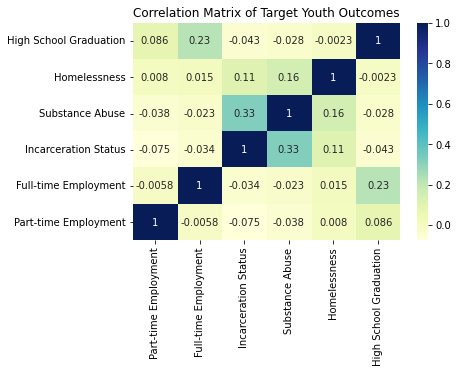


Corr with Substance Abuse:


KeyError: ignored

In [ ]:
# Substance Abuse

print("***** ALL AGES ******\n")
corr = outcome_df.drop("age",axis=1).corr()
corr=corr.rename(columns={"edu_binary":"High School Graduation", "homeless_yes":"Homelessness", "subabuse_yes":"Substance Abuse", "incarc_yes":"Incarceration Status",
                     "currpte_yes":"Part-time Employment", 'currfte_yes':"Full-time Employment"},
            index ={"edu_binary":"High School Graduation", "homeless_yes":"Homelessness", "subabuse_yes":"Substance Abuse", "incarc_yes":"Incarceration Status",
                     "currpte_yes":"Part-time Employment", 'currfte_yes':"Full-time Employment"})
sb.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix of Target Youth Outcomes")
plt.gca().invert_xaxis()
plt.show()
print("\nCorr with Substance Abuse:")
edu_corr = corr.loc["subabuse_yes"]
edu_corr.sort_values(ascending=False, inplace=True)
display(edu_corr.drop(["subabuse_yes"]))


# print("\n\n\n***** UNDER 18 ******\n")
# corr = outcome_df[outcome_df["age"]<=18].drop("age",axis=1).corr()
# print("\nCorr with  Substance Abusey:")
# edu_corr = corr.loc["subabuse_yes"]
# edu_corr.sort_values(ascending=False, inplace=True)
# display(edu_corr.drop(["subabuse_yes"]))

# print("\n\n\n***** OVER 18 ******\n")
# corr = outcome_df[outcome_df["age"]>18].drop("age",axis=1).corr()
# print("\nCorr with Substance Abuse:")
# edu_corr = corr.loc["subabuse_yes"]
# edu_corr.sort_values(ascending=False, inplace=True)
# display(edu_corr.drop(["subabuse_yes"]))

## FUTURE WORK:
## Corr of substance abuse at 17 with outcomes later (reduce sample to 6k)
## Cite other works of early substance abuse effects later in life 
## Services & outcomes are in whole life 

In [ ]:
age_sample = outcome_df.groupby("age")["edu_binary"].count() # people per age
display(age_sample.head())

age
16.0     1270
17.0    26654
18.0      165
19.0      551
21.0     4314
Name: edu_binary, dtype: int64

In [ ]:
#outcome_df = data[["edu_binary","homeless_yes","subabuse_yes","incarc_yes","currfte_yes","currpte_yes","age"]]
individual_df = outcome_df.loc[:,outcome_df.columns != "edu_binary"].groupby("age").sum() # use of each service per age (idx = state, cols = each service)
display(individual_df)


,homeless_yes,subabuse_yes,incarc_yes,currfte_yes,currpte_yes
age,,,,,
16.0,262,169,206,248,361
17.0,5716,5980,7568,1281,4713
18.0,35,55,55,2,18
19.0,121,64,95,96,135
21.0,1252,449,888,1209,1200
22.0,4,1,3,1,1


In [ ]:
individual_df_percap = individual_df.div(age_sample, axis=0)
display(individual_df_percap)

,homeless_yes,subabuse_yes,incarc_yes,currfte_yes,currpte_yes
age,,,,,
16.0,0.206299,0.133071,0.162205,0.195276,0.284252
17.0,0.214452,0.224357,0.283935,0.048060,0.176821
18.0,0.212121,0.333333,0.333333,0.012121,0.109091
19.0,0.219601,0.116152,0.172414,0.174229,0.245009
21.0,0.290218,0.104080,0.205841,0.280250,0.278164
22.0,1.000000,0.250000,0.750000,0.250000,0.250000




 homeless_yes


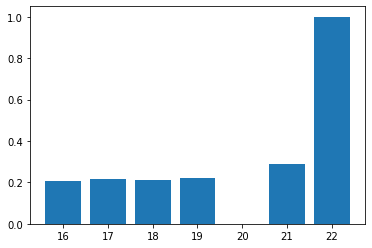



 subabuse_yes


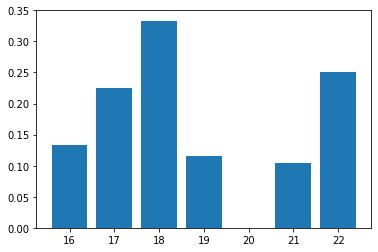



 incarc_yes


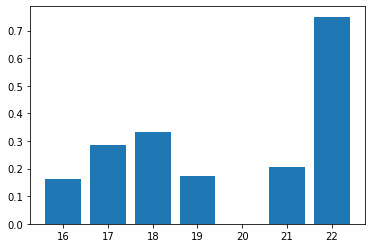



 currfte_yes


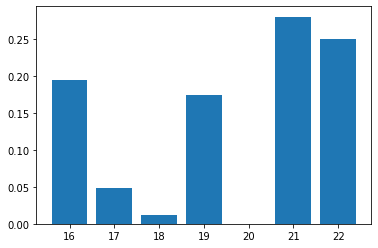



 currpte_yes


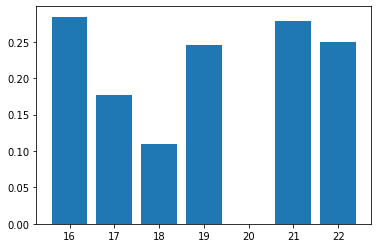

In [ ]:
for i in individual_df_percap.columns:
  print("\n\n",i)
  plt.bar(individual_df_percap.index,individual_df_percap[i])
  plt.show()

In [ ]:
### SUMMARY FOR ALL AGES EDU (in order)

# If you are currently employed you are more likely to graduated HS
# If you are currently part-time employed you are more likely to graduated HS

# If you have not been incarcerated you are more likely to have graduated HS
# If you have not received substance abuse you are more likely to have graduated HS
# If you have not been homeless you are more likely to have graduated HS

# * Age is the last factor for under 18 (but first for all other)
# * Current full time employment is the biggest corr for under 18 (is more relevant than over 18, maybe U shape??)

"""
SUBSTANCE ABUSE: A youth has received a substance abuse referral if the youth was referred for
an alcohol or drug abuse assessment or counseling.
• For a 17-year-old youth in the baseline population, the data element
relates to a youth’s lifetime experience.
• For a 19- or 21-year-old youth in the followup population, the data
element relates to the youth’s experience in the past two years.

HOMELESS: A youth is considered to have experienced homelessness if the youth had no
regular or adequate place to live. This definition includes situations where
the youth is living in a car or on the street, or staying in a homeless or other
temporary shelter.
• For a 17-year-old youth in the baseline population, the data element
relates to a youth’s lifetime experiences.
• For a 19- or 21-year-old youth in the followup population, the data
element relates to the youth’s experience in the past two years.
"""
